In [119]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt


## Plot do Gráfico

In [120]:
# y' = 2*cos(2x) - sen(x)
# y(0) = 2
# C = 1,5 



def phi(t,y,dt): #função de discretização
    #------------------------- #Runge-kutta
    k1 = f(t, y)
    k2 = f(t+dt/2, y + dt/2*k1)
    k3 = f(t+dt/2, y + dt/2*k2)
    k4 = f(t+dt, y + dt*k3)
    
    return 1/6*(k1 + 2*k2 + 2*k3 + k4)     
    #------------------------- Euler Modificado
    #return 1/2*(f(t,y) + f(t+dt , y + dt*f(t,y) ))

def f(t, y): #função de Discretização
    
    f0 = np.cos(t) - 2*np.sin(2*t)            ### TROCAR PARA CADA FUNCAO
    return f0

def Y(t0,T,n):
    t_n = np.linspace(t0,T,n)
    y_n = []
    for i in range(len(t_n)):
            
            y_n.append(np.cos(2*t_n[i]) + np.sin(t_n[i])) ###TROCAR PARA CADA FUNCAO


    return y_n,np.array(t_n)

def approx(t0,T,y0,n):
    #C.I ------------
    t_n = np.linspace(t0,T,n)
    y_n = [y0] 
    dt = (T-t0)/n
    #----------------
    for i in range(1,len(t_n)):
        y_next = y_n[-1] +  dt*phi(t_n[i],y_n[-1],dt)
        y_n.append(y_next)
    return y_n,t_n   

def generate_dataframe(t_nN,y_nN,name):
    data = pd.DataFrame({
        't_n' : t_nN,
        'y_n' : y_nN,
        'name': name
    }
    )
    return data

def generate_dfs(t0,T,y0,x):
    dfs = []
    for i in range(6,x):
        y_n,t_n = approx(t0,T,y0,2**i) 
        dfs.append(generate_dataframe(t_n,y_n,f'approx 2^{i} == {2**i}'))
    return dfs


def plot_dfs(dfs):
    #sns.set_theme('whitegrid')
    colors = ['#440154','#482475','#414487','#355f8d','#2a788e','#21918c','#22a884','#44bf70','#7ad151','#bddf26']
    grossura_linha =  [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1, 1, 1, 1]
    estilos = [(2,2), (2,2), (2,2), (2,2), (2,2), (2,2), (1,0), (1,0), (1,0), (1,0)]

    for df,cor,width,estilo in zip(dfs,colors,grossura_linha,estilos):
        sns.lineplot(data=df, x='t_n',y='y_n',
                     hue = 'name',palette=[cor],
                     linewidth=width,
                     dashes=estilo
                     )
   
    #plt.xlim(0.6,0.65)
    #plt.ylim(0.7,0.73)

Text(0, 0.5, 'Y')

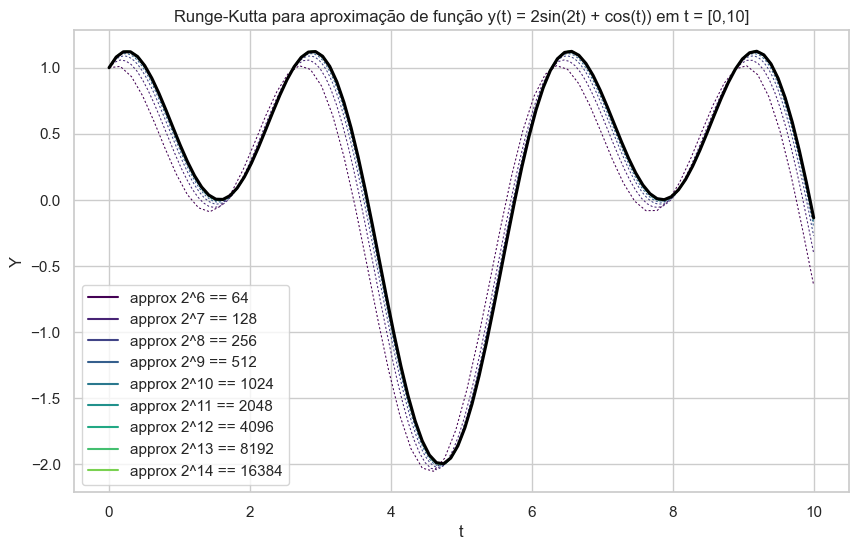

In [127]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))                      
y_n,t_n = Y(0,10,100)                          #(t0,T,n)
df_exato = generate_dataframe(t_n,y_n,'exato')

dfs = generate_dfs(0,10,1,15)                  #(t0,T,y0,NAO MEXER)
plot_dfs(dfs)
sns.lineplot(data=df_exato,x='t_n',y='y_n',color = 'black',linewidth=2.25)
plt.title('Runge-Kutta para aproximação de função y(t) = 2sin(2t) + cos(t)) em t = [0,10]')
plt.xlabel('t')
plt.ylabel('Y')

In [131]:
df_aprox = dfs[0]

df_aprox.to_csv('manufat.csv')

## Cálculo do Erro Global

In [122]:
def erro_global(dfs,df_exato):
    e_g = []
    for df in dfs:
        e_g.append(df_exato['y_n'].iloc[-1] - df['y_n'].iloc[-1])
    return e_g

#dt/2
#dt/4
#dt/8
#...

def erro_q(e_g):
    Q = []
    for i in range(len(e_g)-1):
        Q.append(e_g[i] / e_g[i+1])
    Q.append(4)
    return Q

def gera_tabela(dfs,df_exato,t0,T):
    e_g = erro_global(dfs,df_exato)
    n = [2**6,2**7,2**8,2**9,2**10,2**11,2**12,2**13,2**14]
    q = erro_q(e_g)
    log2 = [math.log2(j) for j in q]
    dt = []
    for i in range(len(n)):
        dt.append((T-t0)/n[i])
    
    tabela_erro = pd.DataFrame({
        'n' : n,
        'erro global' : e_g,
        'q' : q,
        'log2' : log2,
        'dt' : dt
    })
    
    return tabela_erro

In [123]:
tabela = gera_tabela(dfs,df_exato,0,5)
tabela

,n,erro global,q,log2,dt
0,64,0.509437,1.909810,0.933429,0.078125
1,128,0.266748,1.959423,0.970429,0.039062
2,256,0.136136,1.980842,0.986113,0.019531
3,512,0.068726,1.990703,0.993278,0.009766
4,1024,0.034524,1.995422,0.996694,0.004883
5,2048,0.017301,1.997729,0.998361,0.002441
6,4096,0.008661,1.998869,0.999184,0.001221
7,8192,0.004333,1.999435,0.999593,0.000610
8,16384,0.002167,4.000000,2.000000,0.000305


In [124]:
def gera_tabela2(dfs):
    n = [2**6,2**7,2**8,2**9,2**10,2**11,2**12,2**13,2**14]
    u = []
    for i in range(len(dfs) - 2):
        u.append( (dfs[i]['y_n'].iloc[-1] - dfs[i+1]['y_n'].iloc[-1]) / (dfs[i+1]['y_n'].iloc[-1] - dfs[i+2]['y_n'].iloc[-1]))
    u.append('---')
    u.append('---')
    tabela_erro2 = pd.DataFrame({
        'n' : n,
        'ordem' : u
    })
    return tabela_erro2

In [125]:
tabela2 = gera_tabela2(dfs)
tabela2

,n,ordem
0,64,1.858098
1,128,1.937585
2,256,1.970887
3,512,1.985963
4,1024,1.99311
5,2048,1.996587
6,4096,1.998302
7,8192,---
8,16384,---
